In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' ## 고화질 그래프 출력

슝=3


In [3]:
df = pd.read_csv('data/Pokemon.csv')

df

총 11개의 피쳐가 있으며, 각각은 포켓몬의 ID, 이름, 첫 번째 속성, 두 번째 속성, 스탯의 총합, HP, 공격력, 방어력, 특수 공격력, 특수 방어력, 그리고 속도를 나타냅니다.

In [6]:
pokemon = df.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [8]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = # [[YOUR CODE]]
print(ordinary.shape)
ordinary.head()

SyntaxError: invalid syntax (532356587.py, line 2)

## (1) 결측치와 전체 칼럼

In [9]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int  
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str  
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str  
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str  
Total : 전체 6가지 스탯의 총합. int  
HP : 포켓몬의 체력. int  
Attack : 물리 공격력. (scratch, punch 등) int  
Defense : 물리 공격에 대한 방어력. int  
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int  
Sp. Def : 특수 공격에 대한 방어력. int  
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int  
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int  
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool  

## (2) ID와 이름

In [11]:
len(set(pokemon["#"]))

721

In [12]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [13]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
# 다음과 같이 pokemon["Name"]을 집합(set)으로 만들어 준 후 길이(len)를 확인하면 중복이 사라지면서 유일한 이름의 개수를 확인할 수 있습니다.
# [[YOUR CODE]]

## (3) 포켓몬의 속성

In [14]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [15]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

파이썬 차집합 함수(set difference) : https://www.w3schools.com/python/ref_set_difference.asp

In [16]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [17]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Psychic', 'Bug', 'Ghost', 'Fire', 'Dragon', 'Dark', 'Fighting', 'Rock', 'Grass', 'Electric', 'Water', 'Fairy', 'Ice', 'Flying', 'Poison', 'Steel', 'Normal', 'Ground']


판다스 isna() 함수 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

In [18]:
pokemon["Type 2"].isna().sum()

386

### Type 1 데이터 분포 plot

In [22]:
ordinary = pokemon[pokemon['Legendary']==False]
legendary = pokemon[pokemon['Legendary']==True]

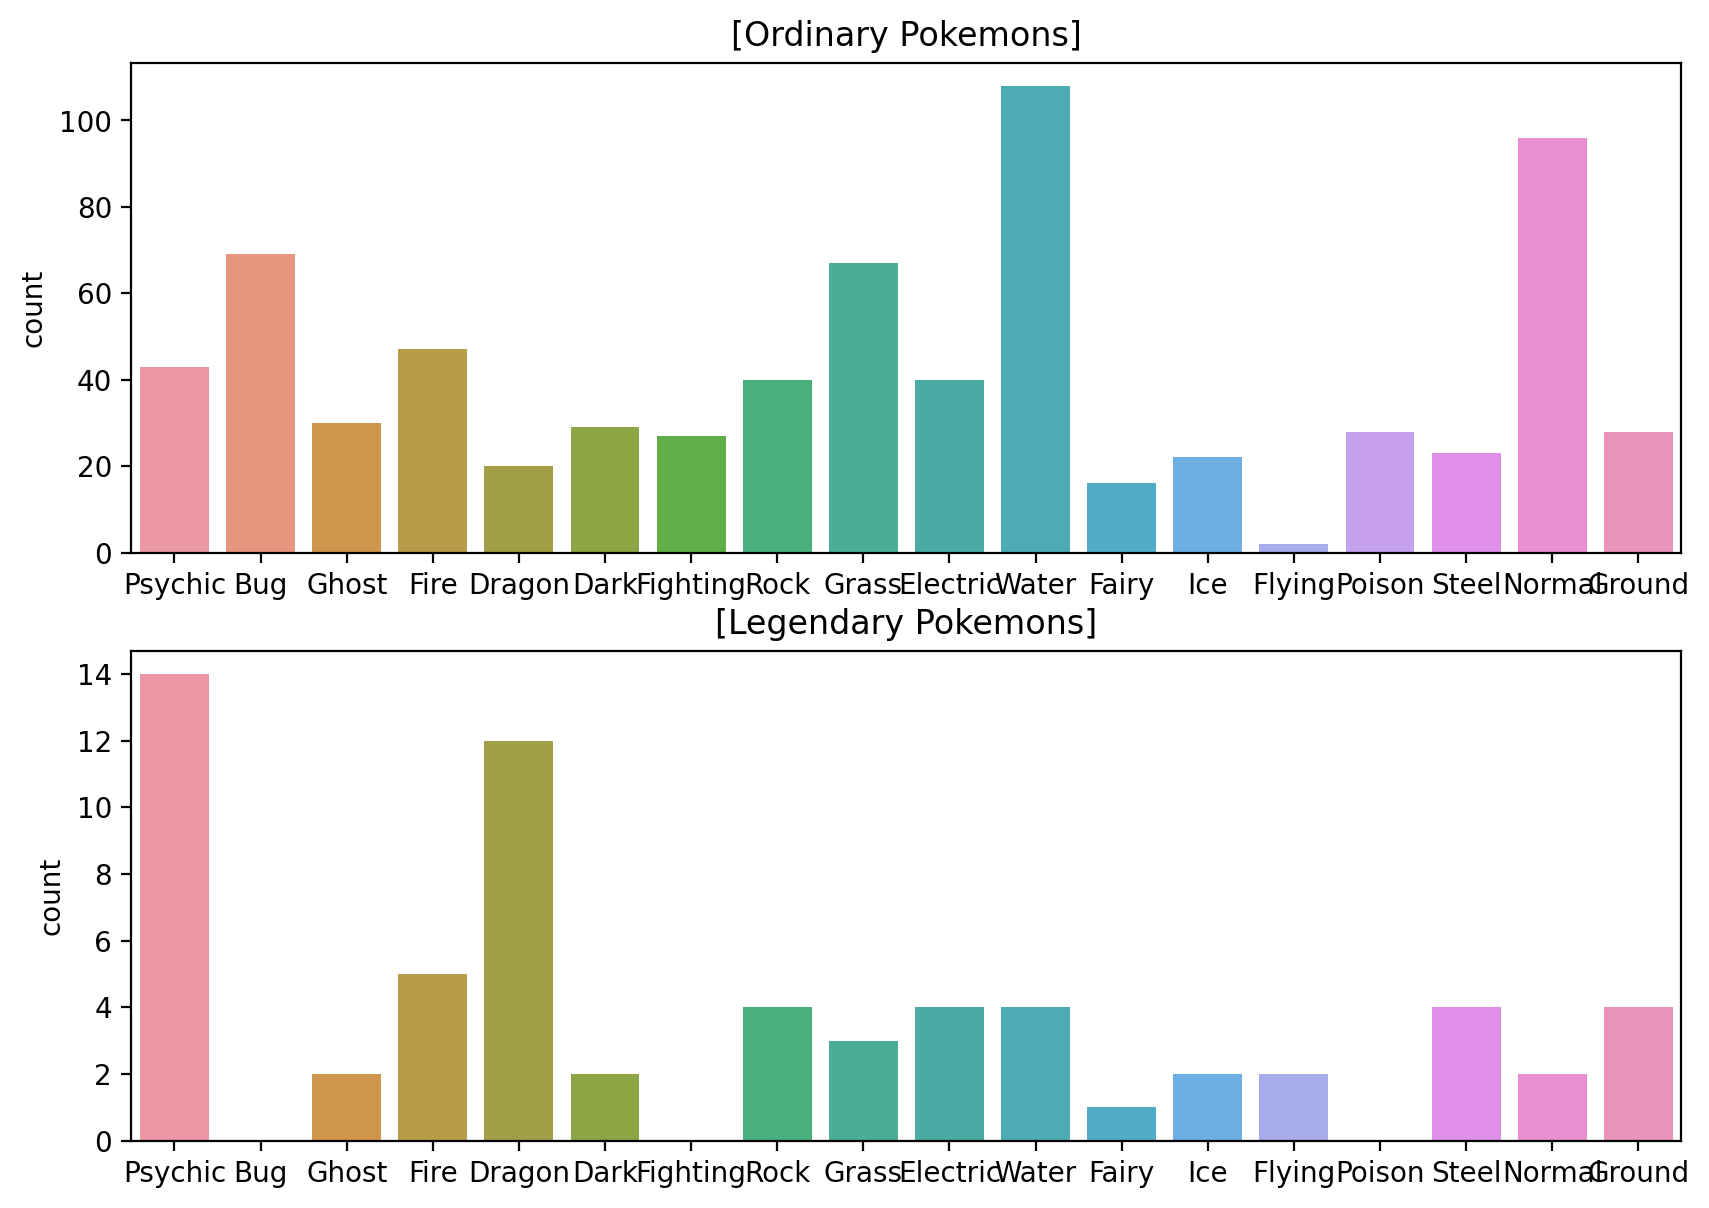

In [23]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()


- 일반 포켓몬에는 물(Water) 속성, 노말(Normal) 속성, 벌레(Bug) 속성 등이 많습니다.
- 반면, 전설의 포켓몬에는 드래곤(Dragon) 속성, 에스퍼(Psychic) 속성이 많습니다.

In [24]:
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


### Type 2 데이터 분포 plot


그렇다면 Type 2는 어떨까요?
참고로, Type 2에는 NaN(결측값)이 존재했었습니다. Countplot을 그릴 때는 결측값은 자동으로 제외됩니다.

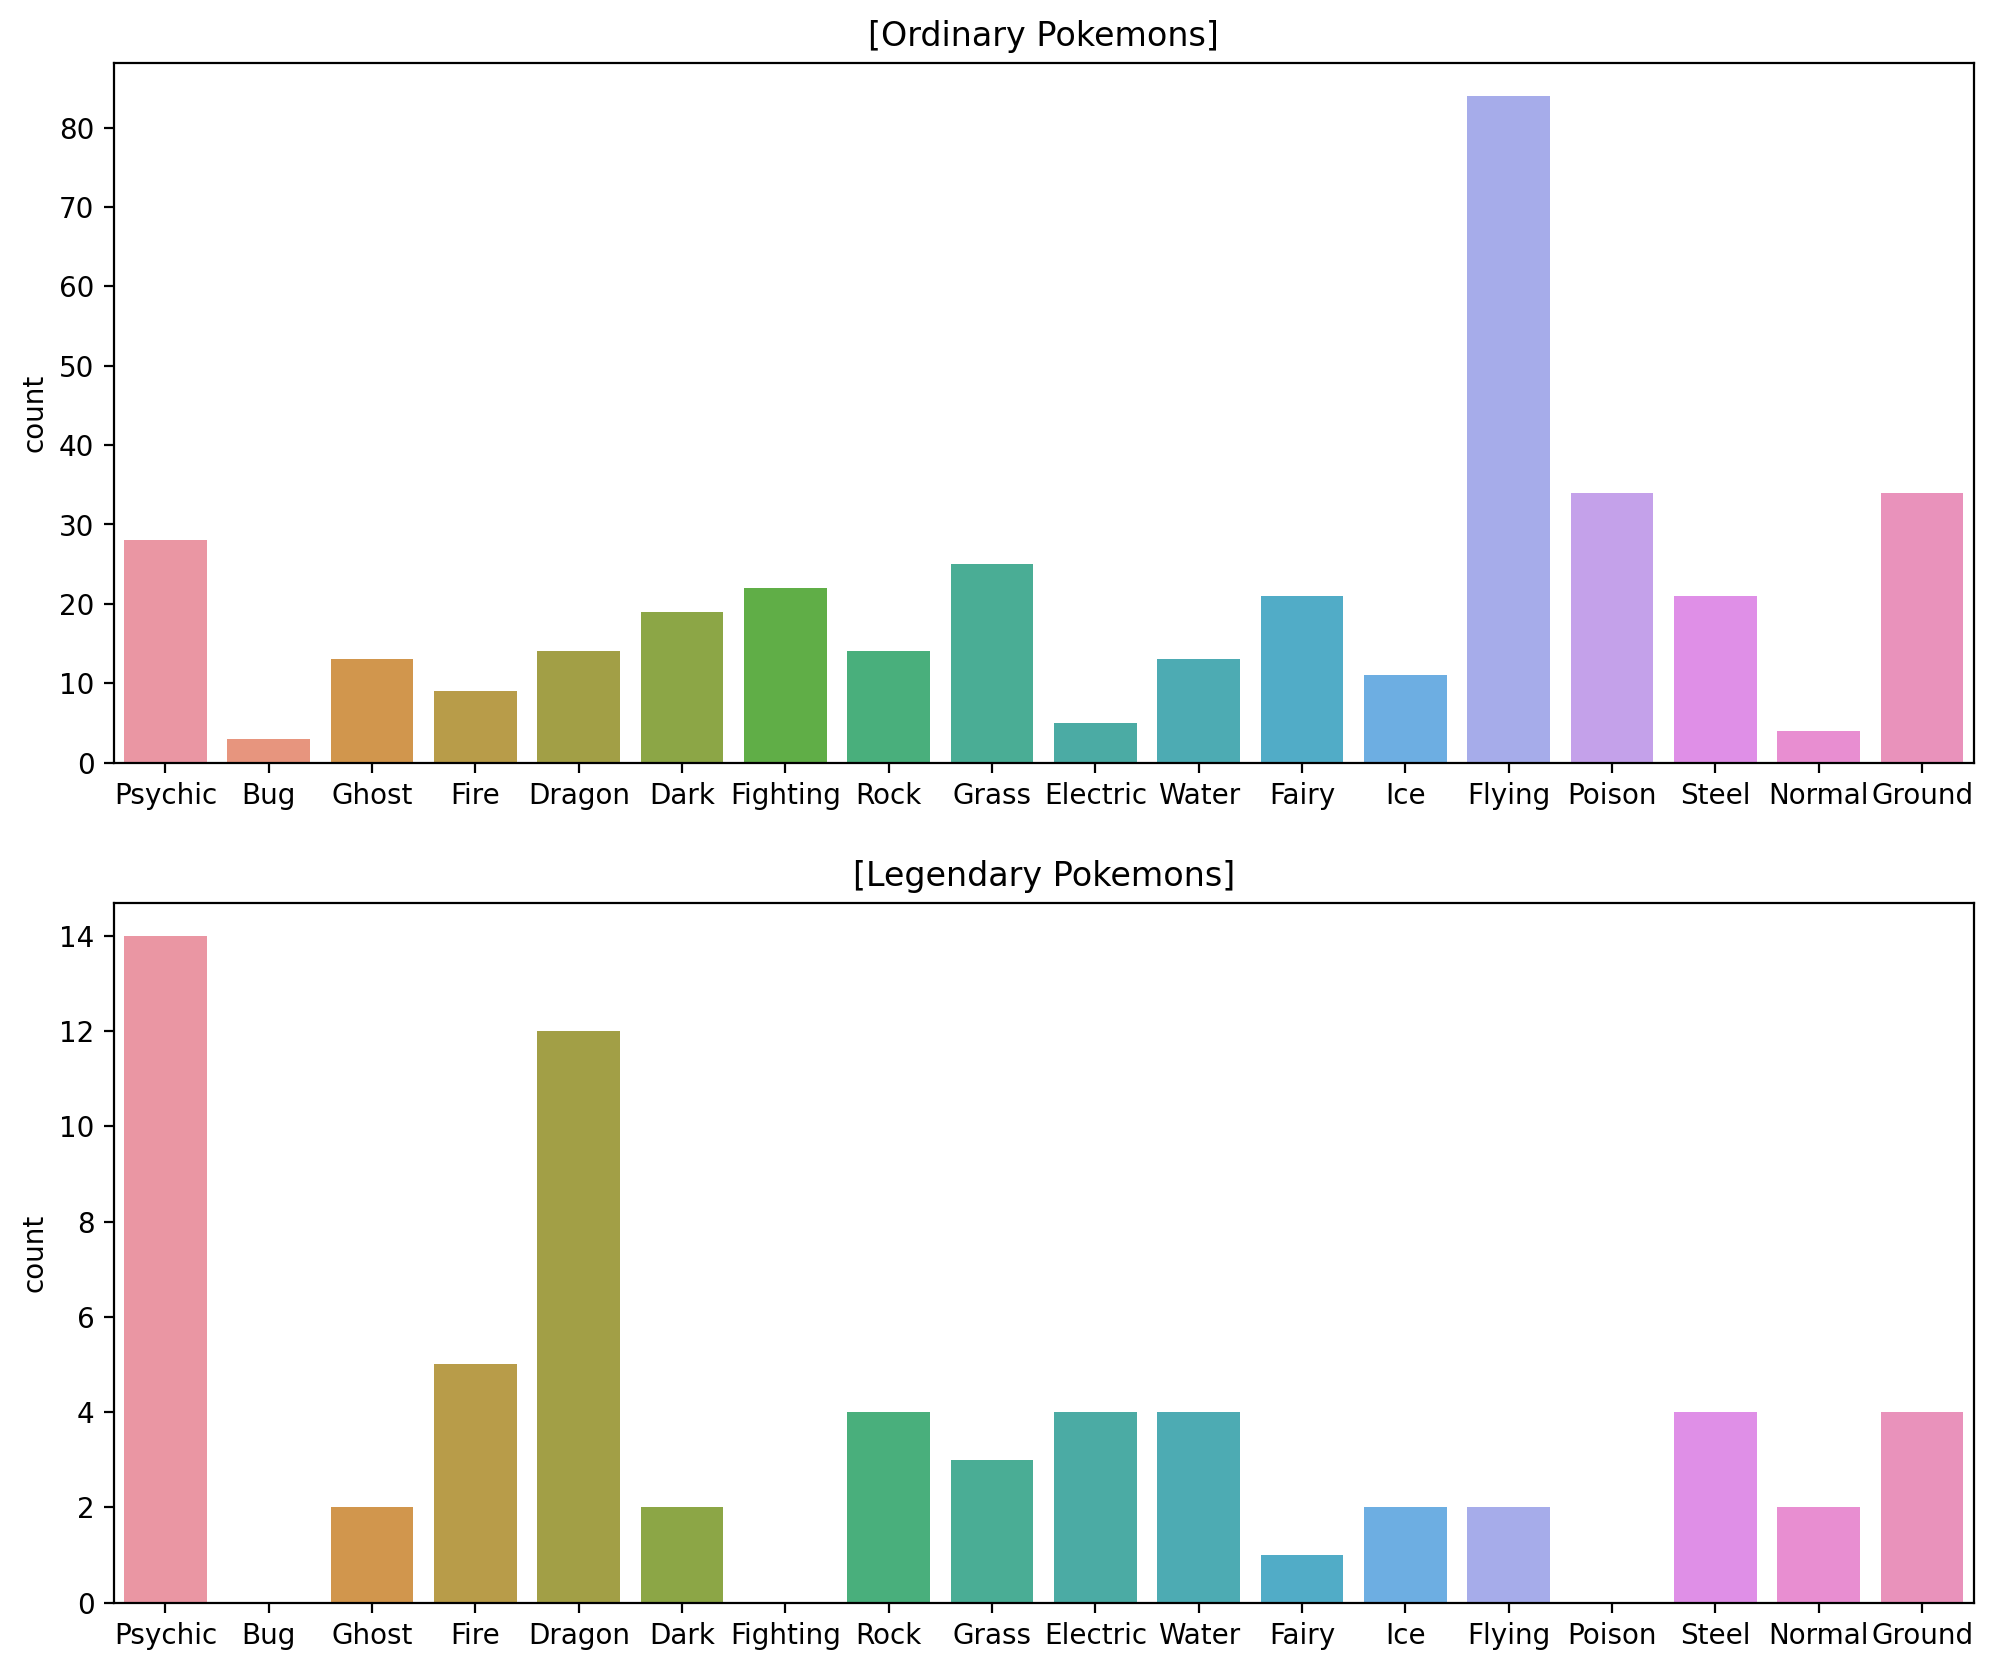

In [25]:
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [26]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


## (4) 모든 스탯의 총합

In [27]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [28]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


pandas sum() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

In [29]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
# [[YOUR CODE]]

네, Total값과 모든 stats의 총합이 같은 포켓몬은 전체 데이터의 수와 같은 800마리군요.
전부 다 같은 것을 확인하였습니다

### Total값에 따른 분포 plot

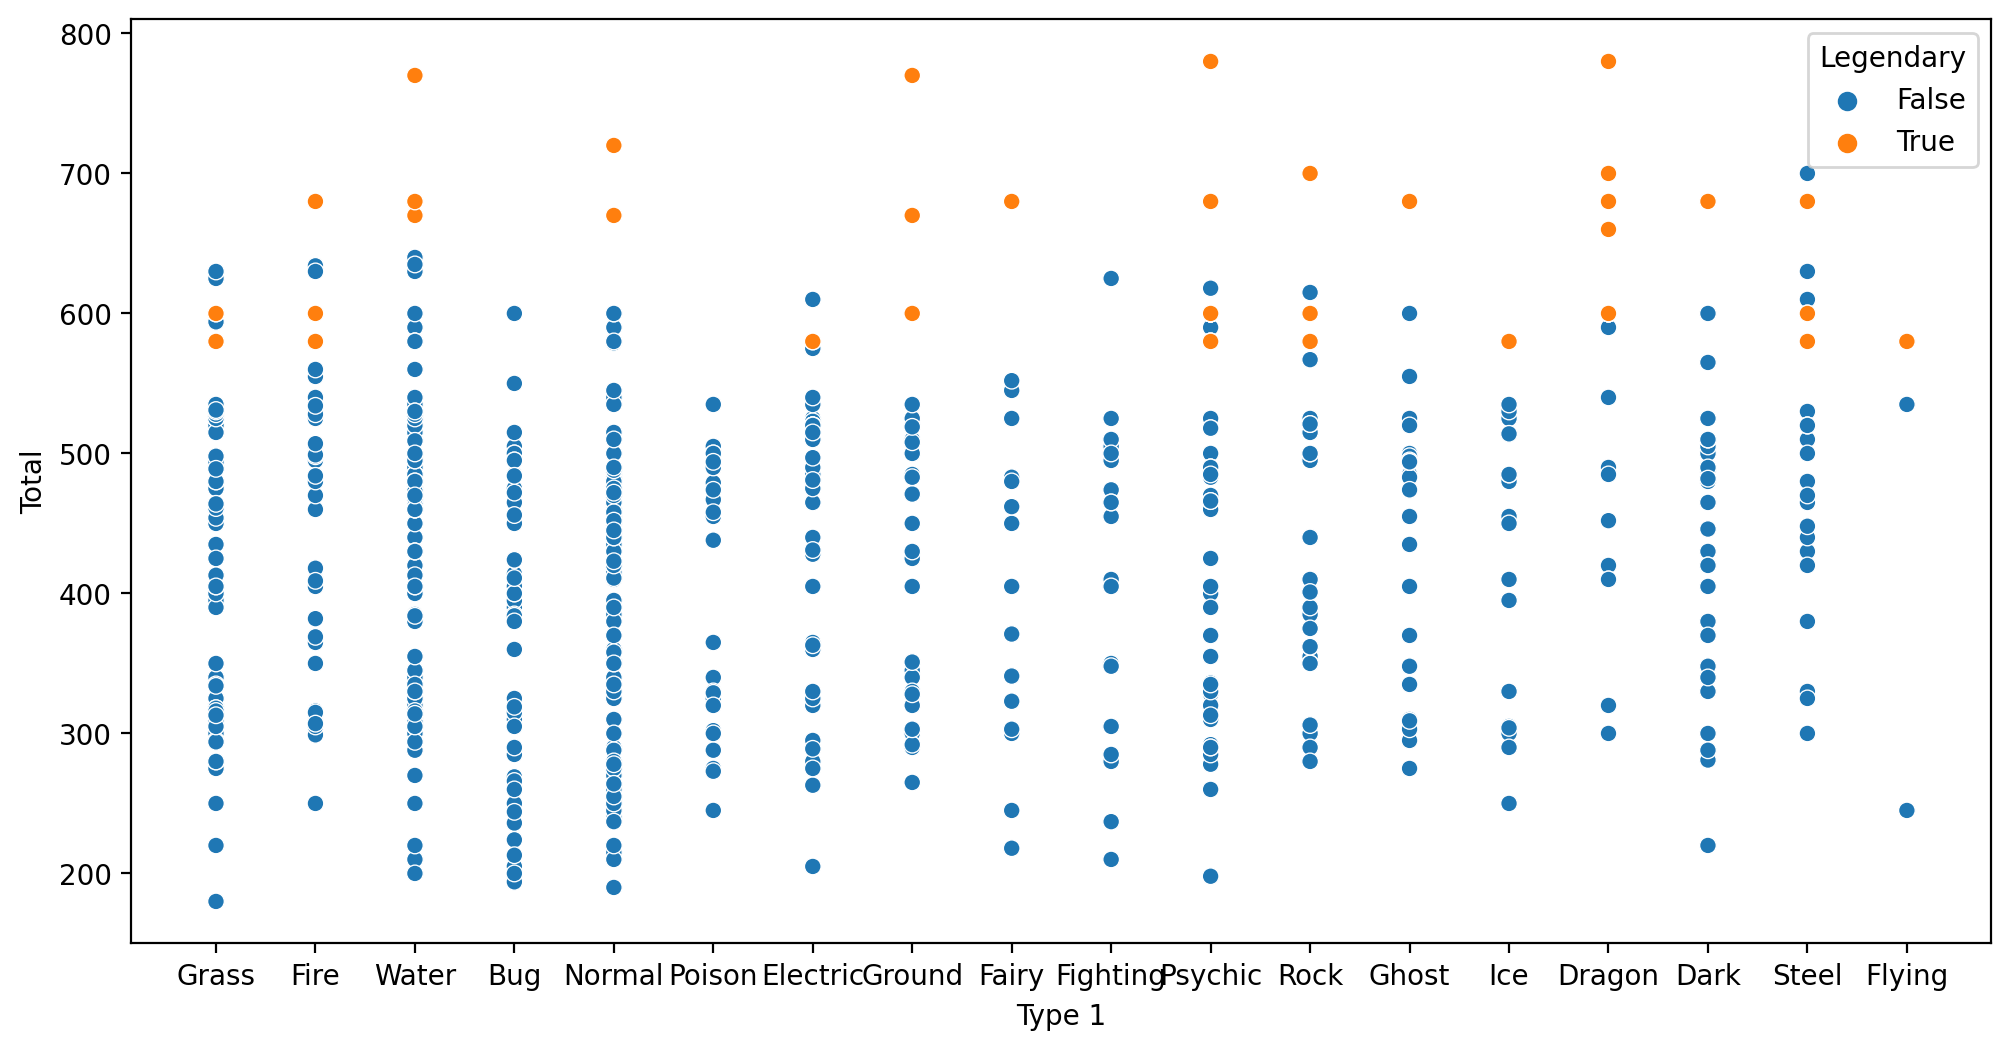

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

## (5) 세부 스탯

세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed


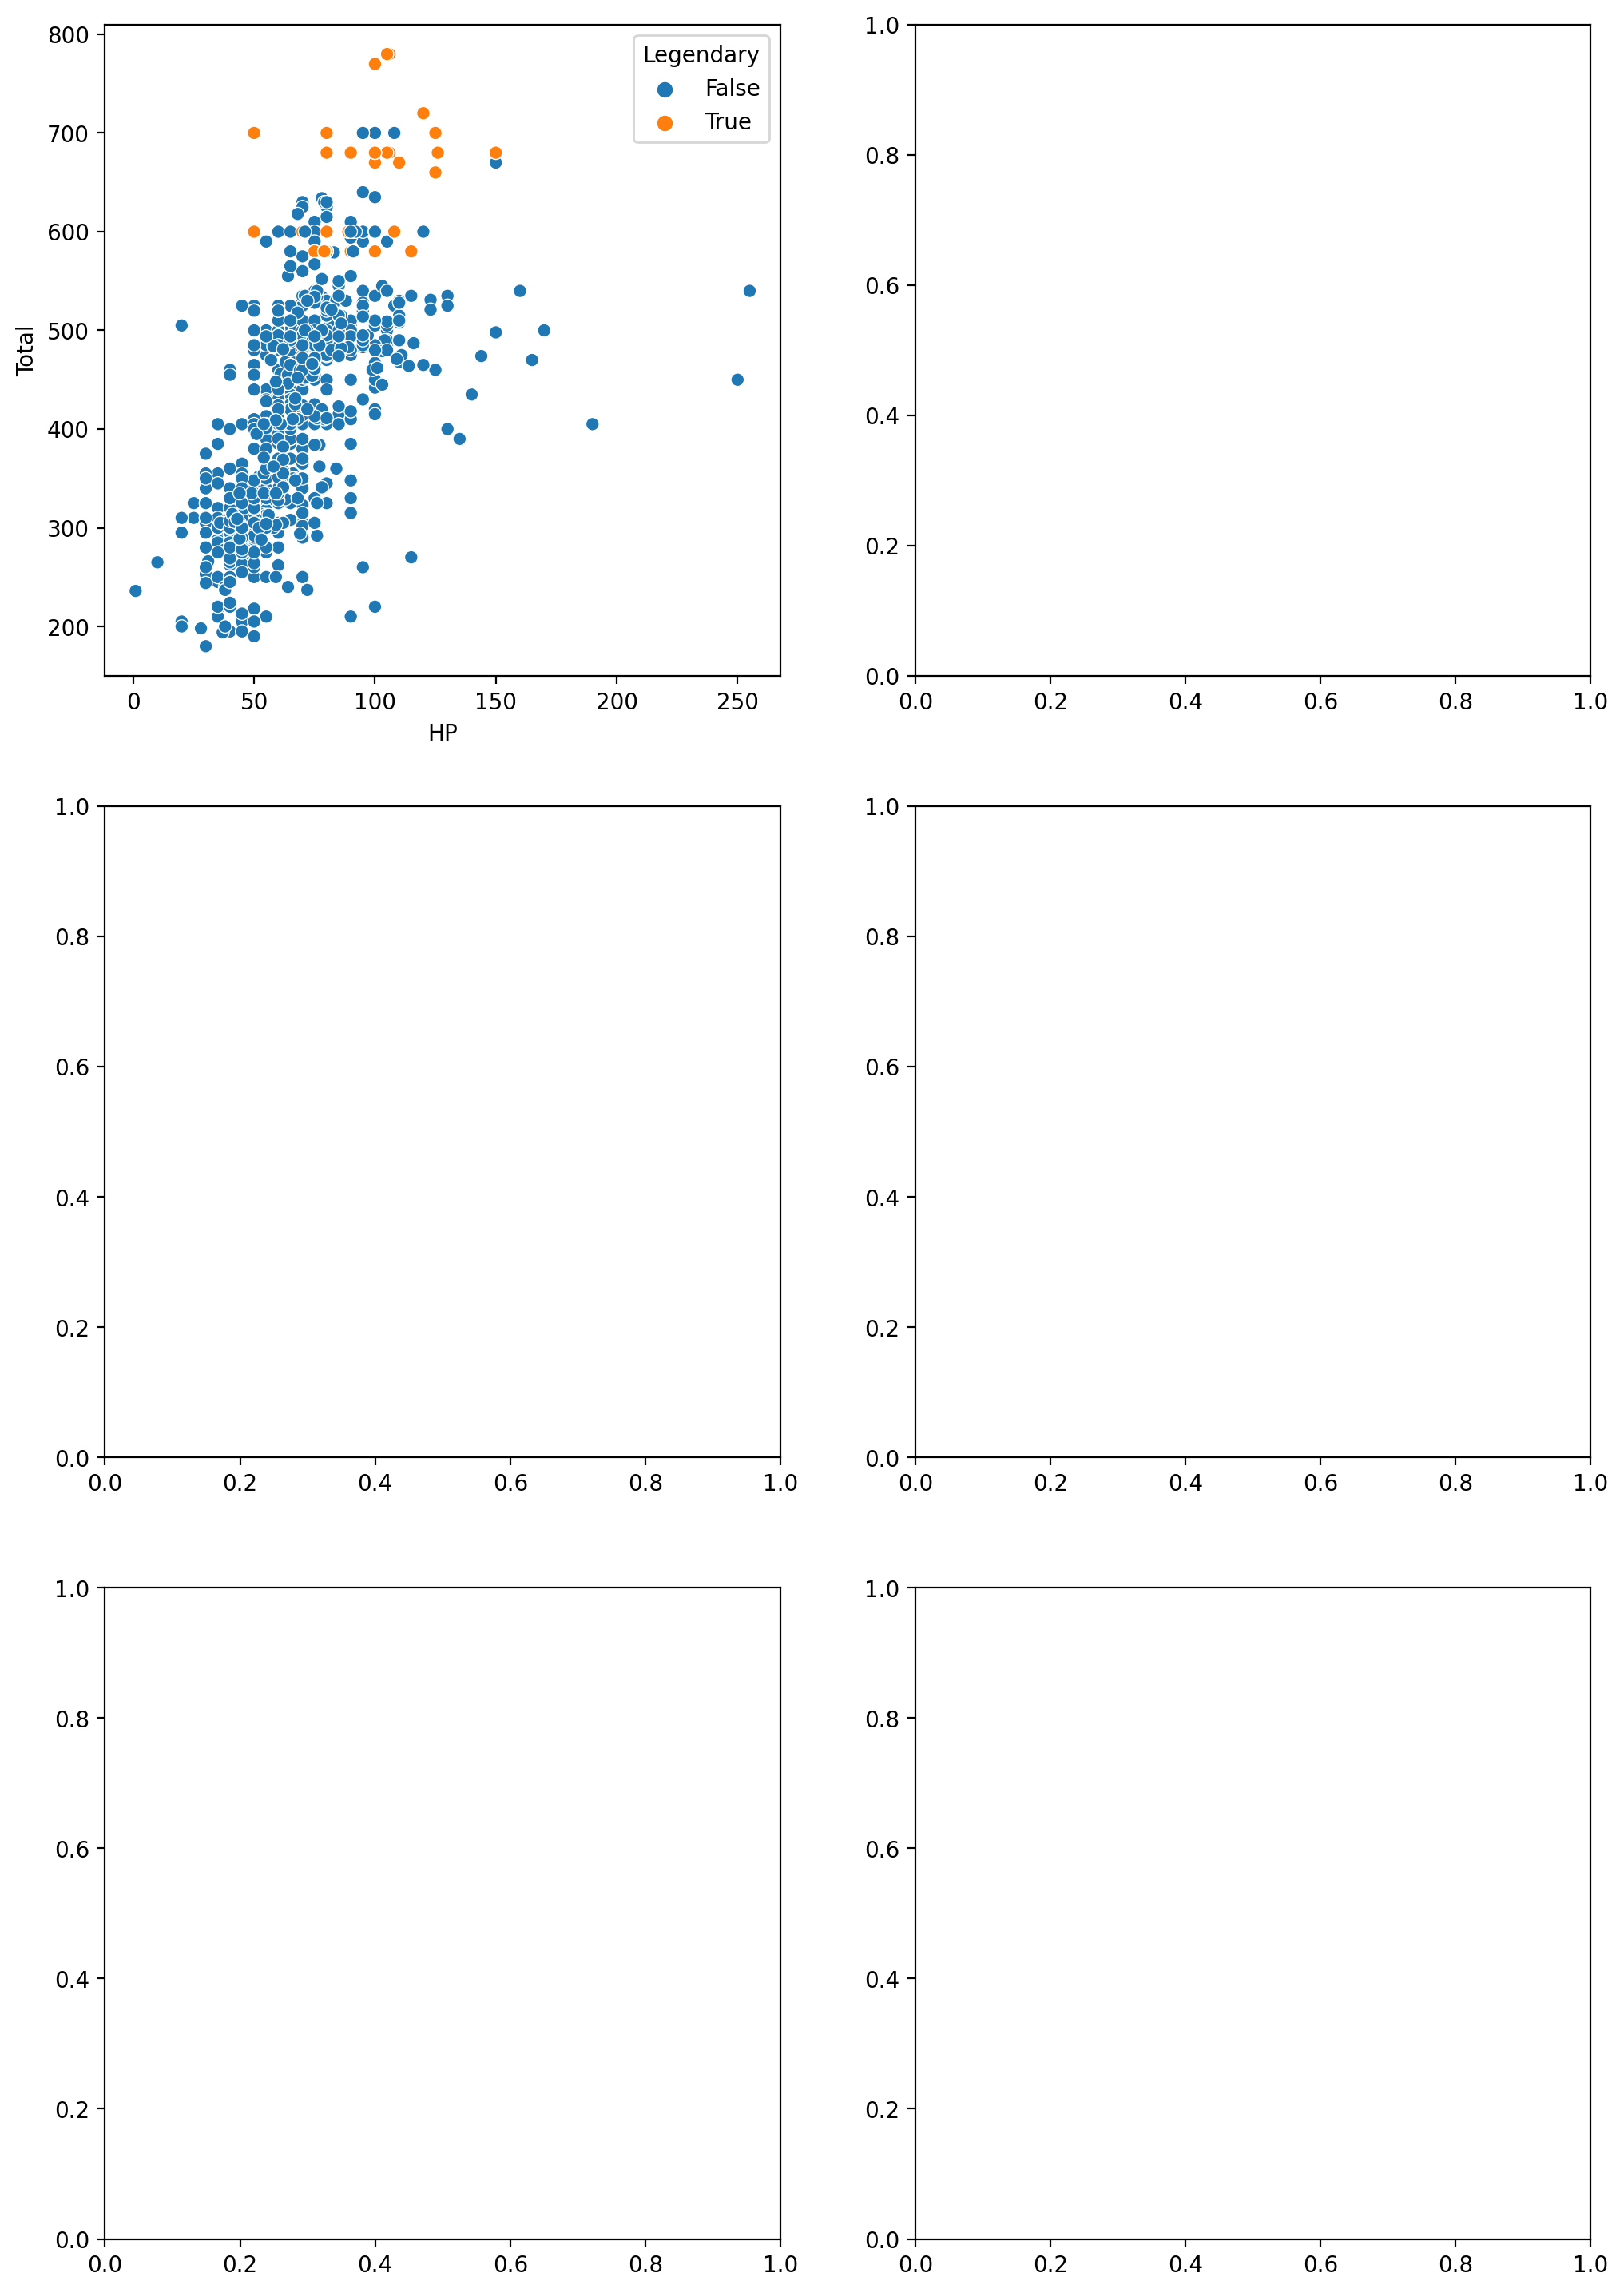

In [32]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
# [[YOUR CODE]]

# "Defense" 스탯의 scatter plot
# [[YOUR CODE]]

# "Sp. Atk" 스탯의 scatter plot
# [[YOUR CODE]]

# "Sp. Def" 스탯의 scatter plot
# [[YOUR CODE]]

# "Speed" 스탯의 scatter plot
# [[YOUR CODE]]

plt.show()

각 스탯에 대한 분석
  
- HP, Defense, Sp. Def
    - 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.

    - 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)

- Attack, Sp. Atk, Speed
    - 이 세 가지 스탯은 Total과 거의 비례합니다.
    - 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

## (6) 세대

 Generation : 포켓몬의 세대


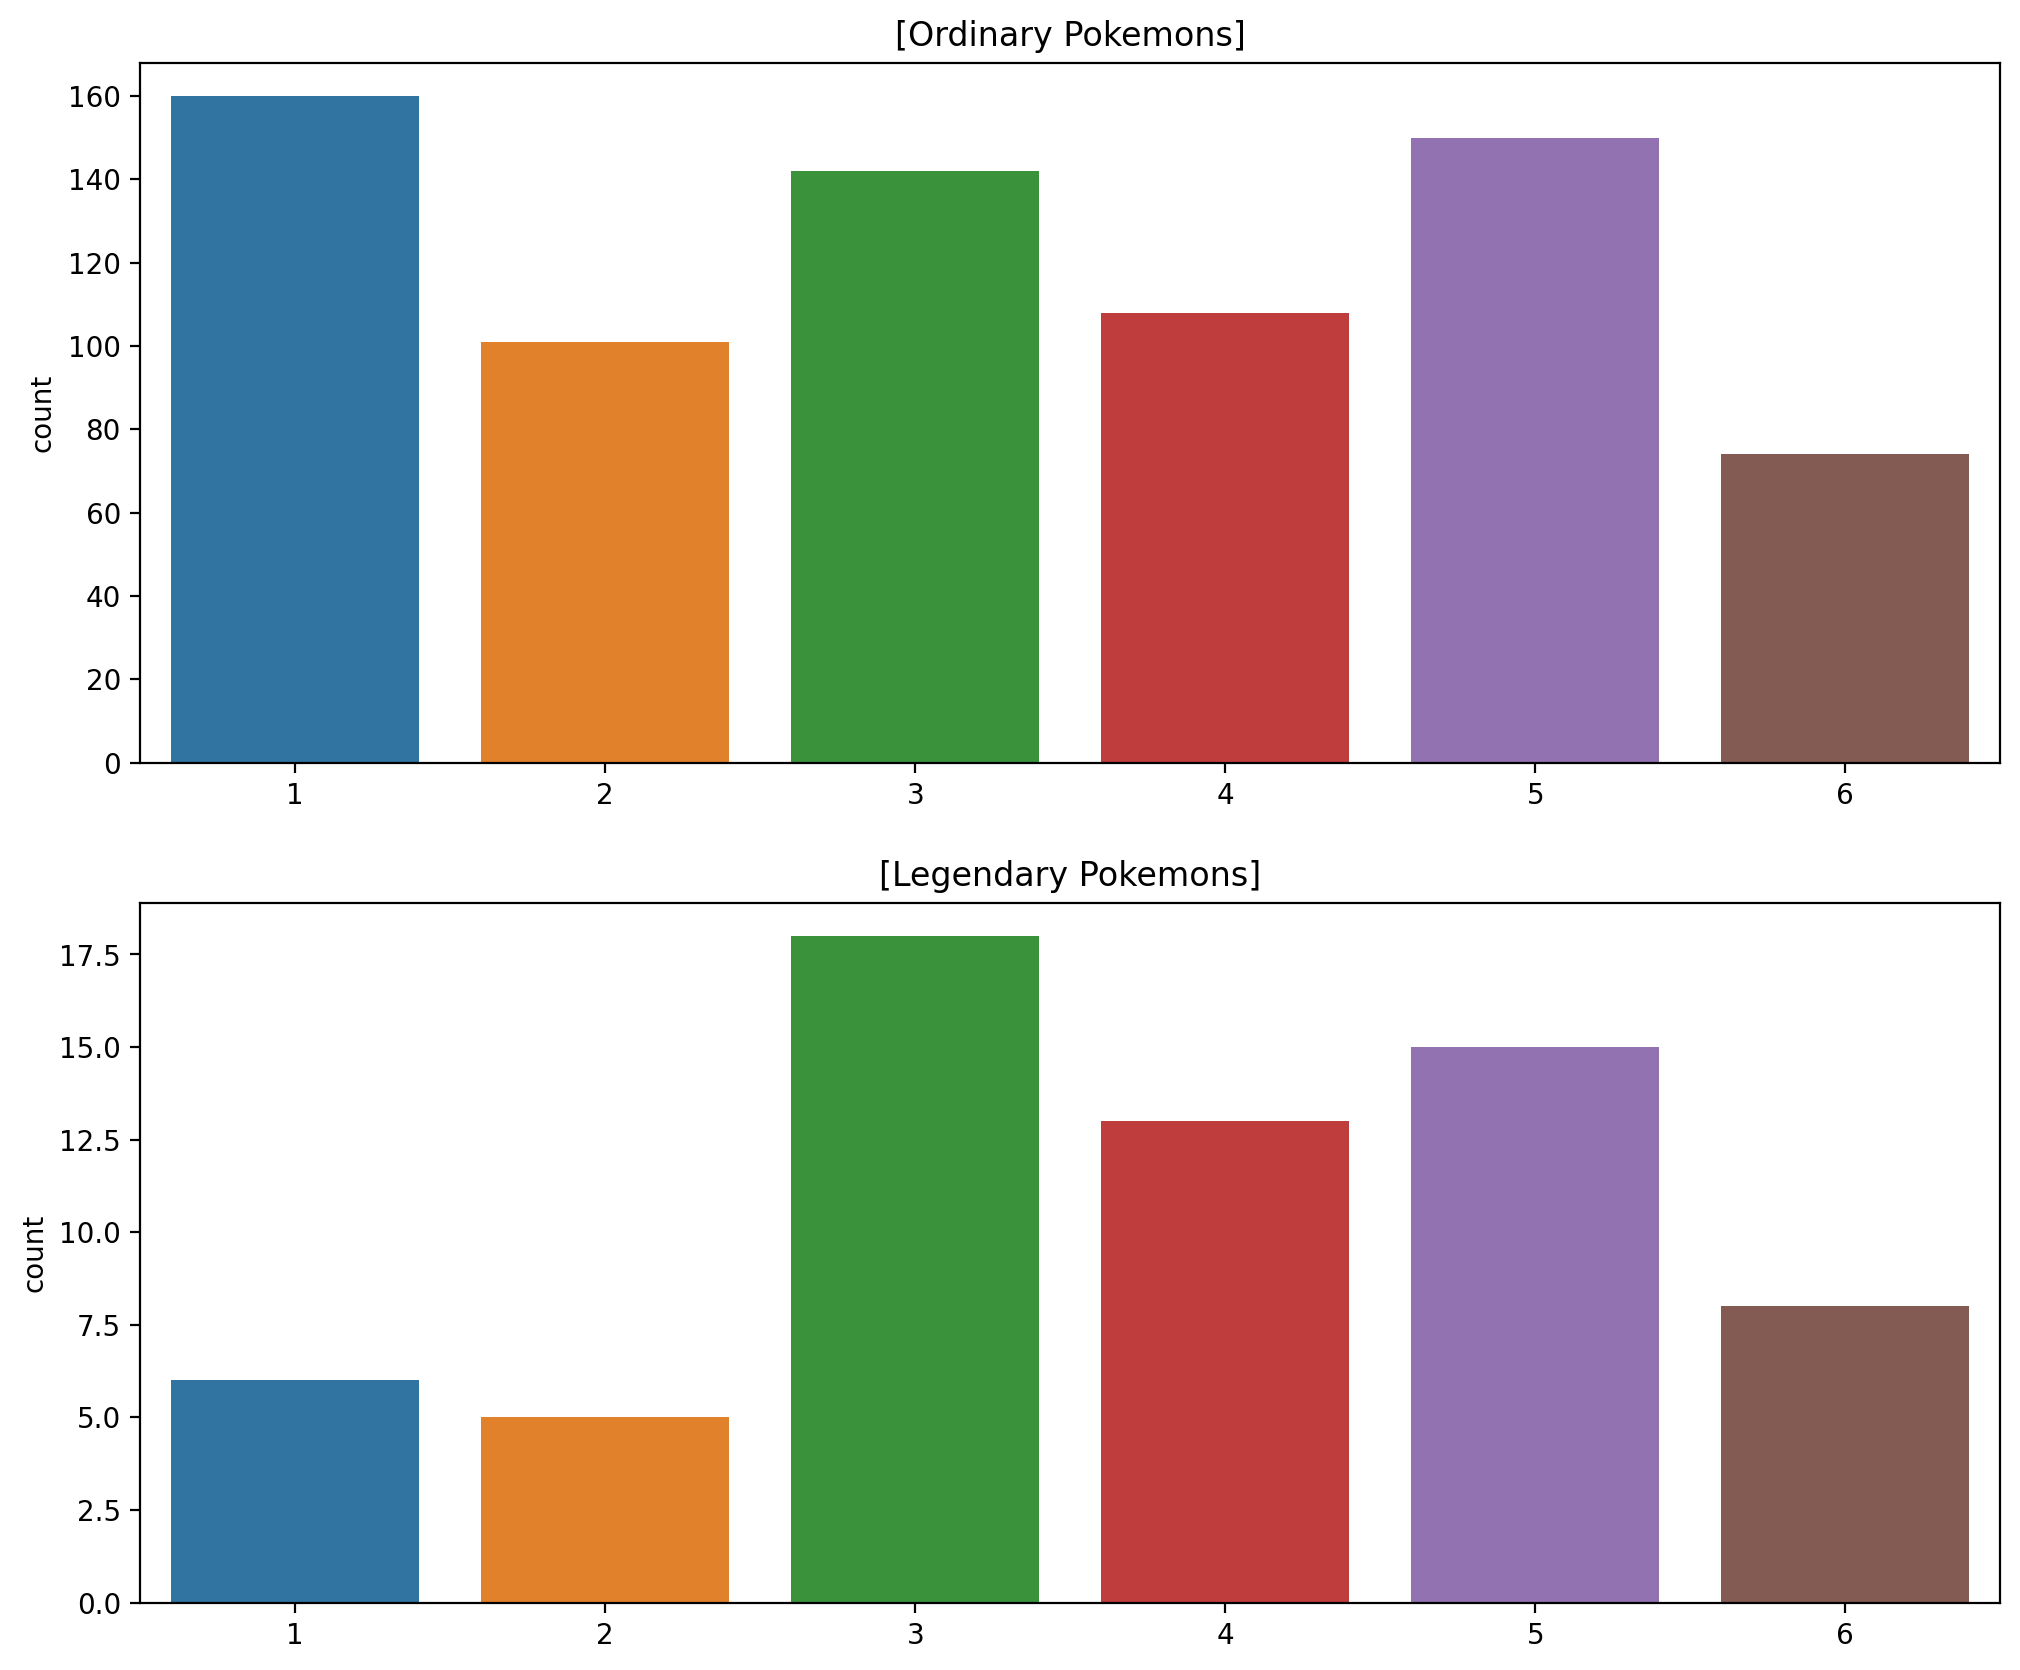

In [34]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

## 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값


우리의 목표는 전설의 포켓몬을 일반 포켓몬에서 분류해 내는 것이니, 각각이 가지는 특징들을 세분화해서 확인해 봐야겠죠!
이제 특별히 legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석해 보겠습니다.



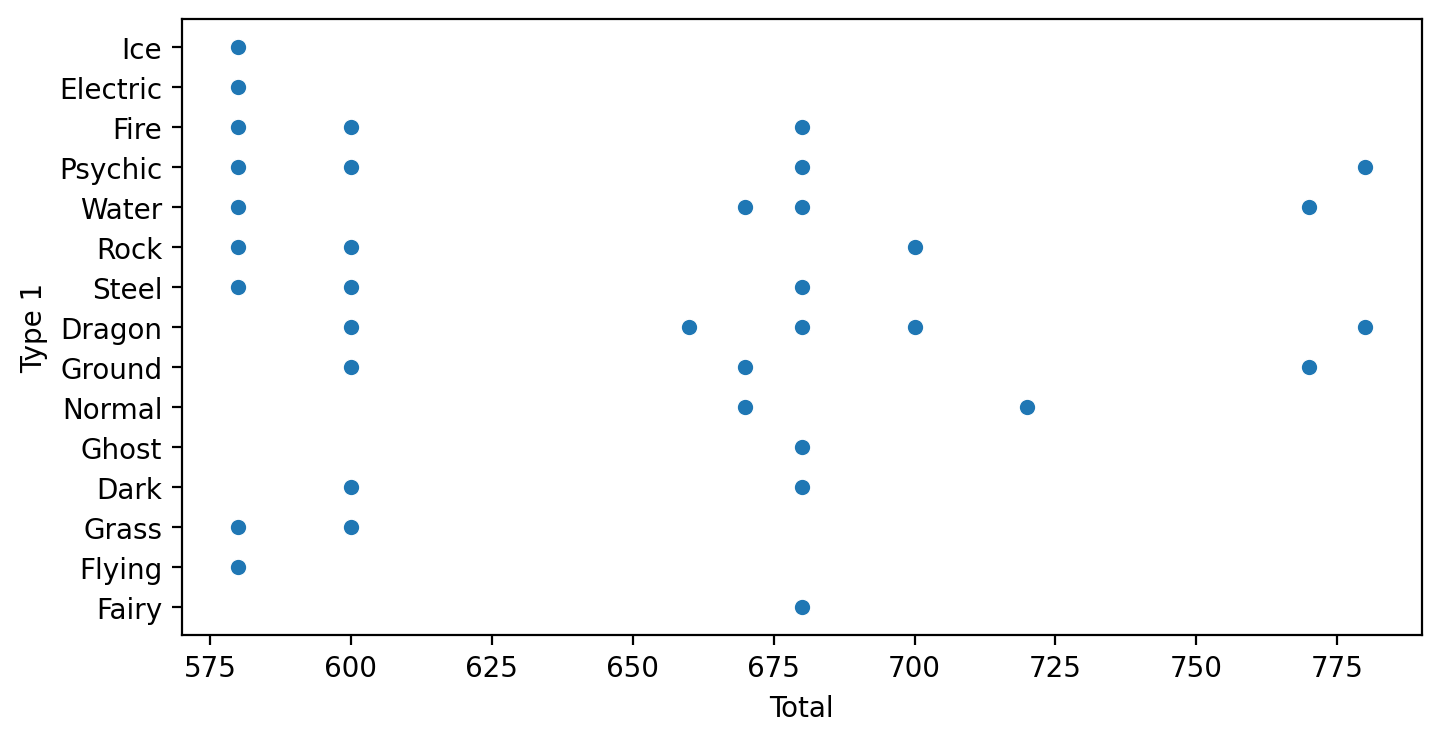

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [36]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


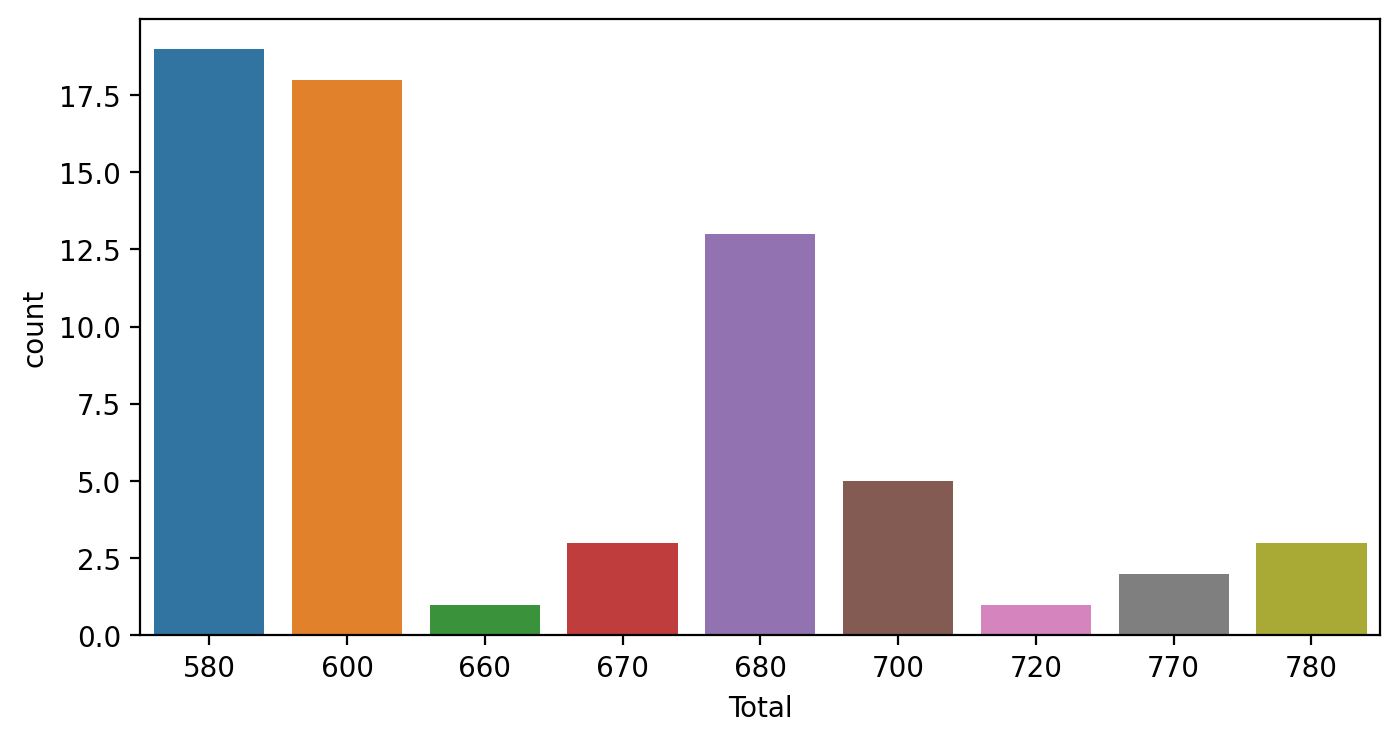

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [38]:
round(65 / 9, 2)

7.22

In [39]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
# [[YOUR CODE]]

In [ ]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
# [[YOUR CODE]]

In [40]:
round(735 / 195, 2)

3.77

약 3.77마리만 같은 Total 스탯 값을 가지는군요.  

이로써 다음의 두 가지를 알 수 있습니다.  

Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.  
: 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.  
    
또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780  
: Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.  
  
즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.  



## 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

데이터를 보고 있으면 한 가지 더 특이한 점이 있습니다. 바로 이름!    

전설의 포켓몬들의 이름을 보면, 특정 단어가 들어가 있는 이름, 또는 긴 이름을 가진 경우가 많음을 확인할 수 있습니다.  
  
특정 단어가 들어가 있는 이름  
특정 단어가 들어가 있는 이름이 많은지, 바로 확인해 봅시다.  
아래 행들은 비슷한 이름을 가진 포켓몬들의 모임입니다. 이들을 pd.concat으로 합쳐보겠습니다.  

In [42]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


어떤가요? 한눈에 봐도 이름들이 비슷한 경향을 띠는 것을 볼 수 있습니다.
이름은 모든 포켓몬이 각각 다른 유일한(unique) 값들로 이루어진 것을 확인했었는데, 전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재하는 거죠.

특히, 아래 이름들은 모두 세트로 이름이 지어져 있다는 것을 어렵지 않게 확인할 수 있습니다.

"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등의 포켓몬은 비슷한 이름을 가진 포켓몬이 다수 존재합니다.
또는, 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우도 존재합니다.

In [44]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


파이썬 람다 : https://wikidocs.net/64

In [51]:
legendary.loc[:,"name_count"] = legendary["Name"].apply(lambda i: len(i))    

/var/folders/2n/dypjcf651pz4rkj6w4rslb180000gn/T/ipykernel_10084/2884482134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legendary.loc[:,"name_count"] = legendary["Name"].apply(lambda i: len(i))


In [54]:
ordinary.loc[:,"name_count"] = ordinary["Name"].apply(lambda i: len(i))    

/var/folders/2n/dypjcf651pz4rkj6w4rslb180000gn/T/ipykernel_10084/1481688044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinary.loc[:,"name_count"] = ordinary["Name"].apply(lambda i: len(i))


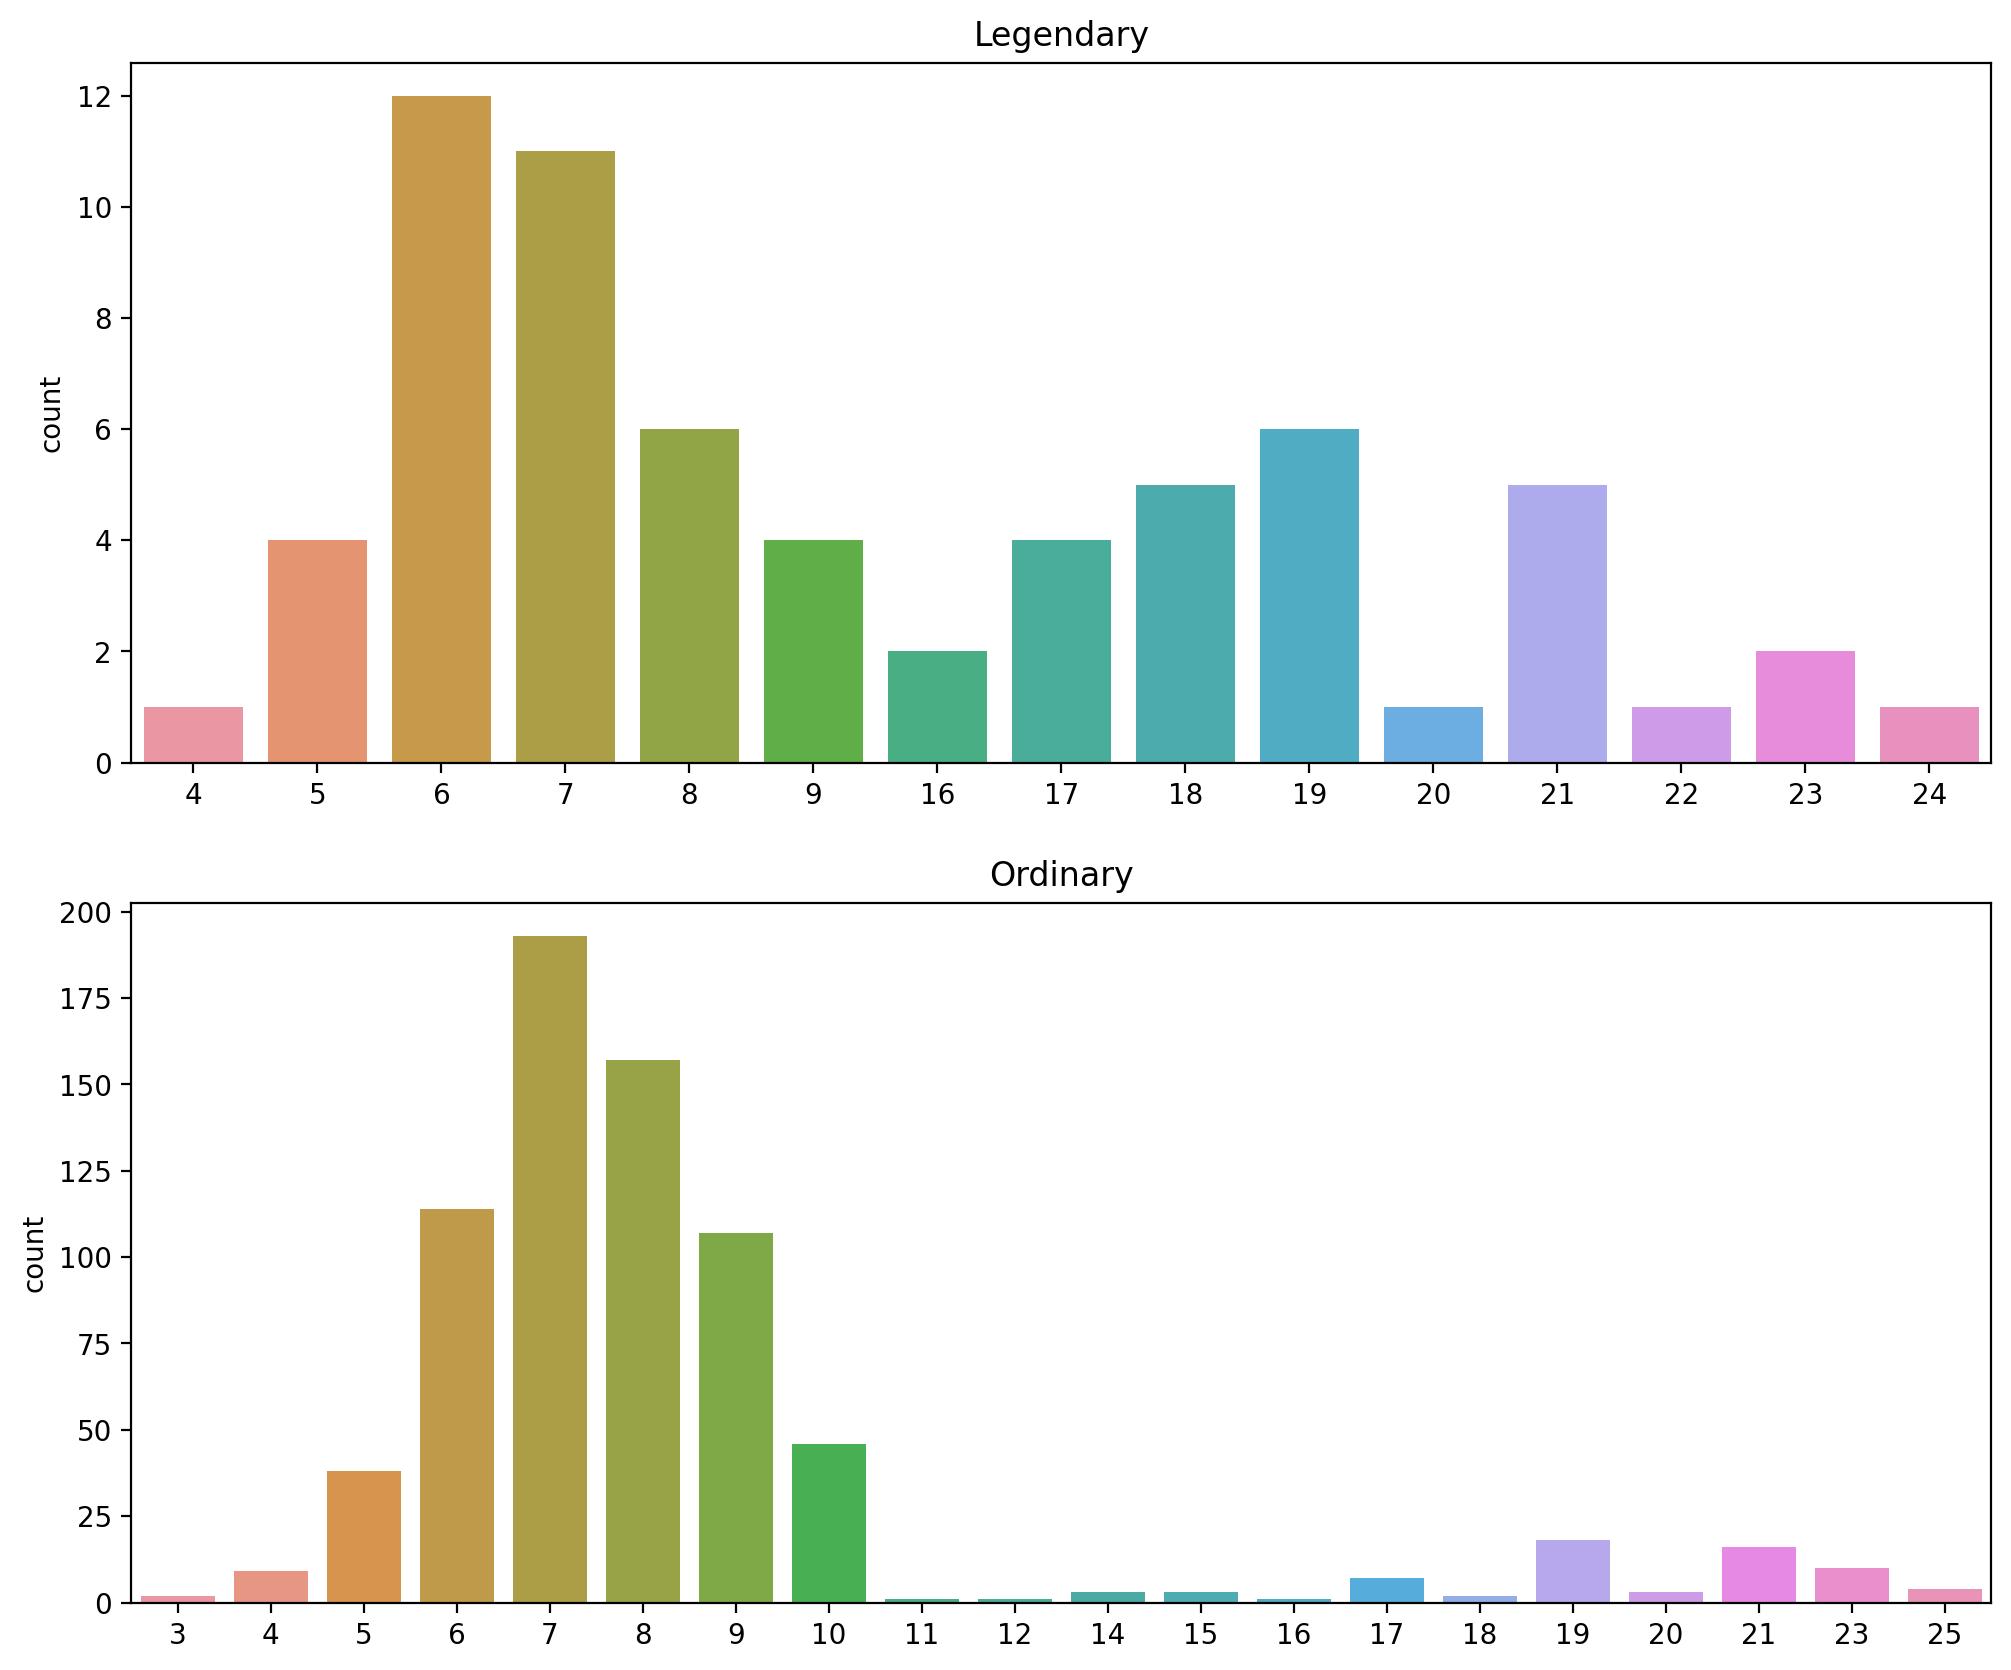

In [55]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [56]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [57]:
print(round(len([ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

0.14 %


전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있습니다!
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는 데에 큰 의미가 있습니다.

위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.

만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!


## 모델에 넣기 위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?

데이터 분석을 통해 머신러닝을 수행하고 싶다면, 데이터를 모델에 입력할 수 있는 형태로 변환하는 것이 매우 중요합니다.

머신러닝을 수행할 모델은 문자열 데이터를 처리할 수 없기 때문에 이를 적절한 숫자 데이터 또는 True, False를 나타내는 부울(bool) 데이터 등으로 전처리하는 과정이 필요합니다.
따라서 지금까지 수행한 EDA 결과에 따라 이름 컬럼을 모델이 연산할 수 있는 형태로 처리를 해 보도록 하겠습니다.

앞서 확인한 EDA 과정에서 이름은 전설의 포켓몬인지 아닌지를 결정하는 중요한 특징 중 하나였죠.
따라서 이름에 관해서는 두 가지를 중점적으로 처리하겠습니다.

1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

In [60]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [61]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


## 8-14. 모델에 넣기 위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출

다음으로 할 일은 전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것입니다.  
이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높을지를 찾아보는 것이죠.  
  
토큰을 추출하기에 앞서, 포켓몬의 이름에 대해 먼저 알아보겠습니다.  
포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.  
  
한 단어면 ex. Venusaur  
두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur  
이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X  
알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme  
이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기  
이 중 가장 먼저 '알파벳이 아닌 문자'를 포함하는 경우를 처리하도록 하겠습니다.  
어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용하면 편리합니다.  

pandas의 isalpha() 함수  : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isalpha.html
우리는 알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데, 주의할 점은 이름에 띄어쓰기가 있는 경우에도 isalpha() = False로 처리된다는 점입니다.  
따라서 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인하도록 하겠습니다.  

In [63]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [64]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [65]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [66]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [67]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
# [[YOUR CODE]]
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


name_isalpha 컬럼이 False인 컬럼이 하나도 없군요. 모든 이름이 알파벳으로만 이루어졌음을 뜻하는 것이죠!

이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
그러면 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.

문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.

정규표현식은 문자열을 다룰 때 아주 유용한 도구지만, 사실 깊게 들어가면 아주 복잡하고 어렵습니다.
따라서 오늘은 맛보기와 같은 형태로 코드를 받아들이면서 진행해 보겠습니다.

파이썬은 정규표현식을 re라는 패키지에서 지원합니다. 다음 페이지에서 re에 대해 간단히 살펴보고 올까요?

정규표현식 : https://wikidocs.net/4308

In [70]:
import re

In [71]:
name = "CharizardMega Charizard X"

In [72]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [73]:
temp = name_split[0]
temp

'CharizardMega'

이 붙어있는 이름을 우리는 대문자로 시작해서 소문자로 끝나는 토큰들로 분리하고 싶습니다.
그러기 위해서는 대문자로 시작해서 소문자로 끝나는 패턴을 찾으면 됩니다.

패턴을 찾는 것은 앞서 import 한 re 패키지의 findall 함수를 이용해서 실행할 수 있습니다.

In [74]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']


여기서 [A-Z][a-z]* 라는 이상한 패턴이 쓰였습니다! 이것이 바로 정규표현식입니다.

세부 의미는 다음과 같습니다.

[A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
[a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
* : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)
따라서 첫 글자가 대문자인 단어들을 분리하는 데에 효과적인 거죠.

지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있습니다.

In [76]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [77]:
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    tokens = []
    for part_name in name:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [78]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['C', 'M', 'C', 'X'], dtype='<U1')

In [79]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

25
['A', 'Z', 'M', 'M', 'M', 'M', 'M', 'X', 'M', 'M', 'M', 'Y', 'R', 'E', 'S', 'L', 'H', 'R', 'R', 'R', 'L', 'L', 'M', 'L', 'L', 'L', 'M', 'L', 'K', 'K', 'P', 'K', 'G', 'G', 'P', 'G', 'R', 'R', 'M', 'R', 'J', 'D', 'N', 'F', 'D', 'A', 'F', 'D', 'D', 'F', 'D', 'S', 'F', 'U', 'M', 'A', 'D', 'P', 'H', 'R', 'G', 'A', 'F', 'G', 'O', 'F', 'D', 'S', 'L', 'F', 'S', 'S', 'F', 'A', 'V', 'C', 'T', 'V', 'T', 'I', 'F', 'T', 'T', 'F', 'T', 'I', 'F', 'T', 'T', 'F', 'R', 'Z', 'L', 'I', 'F', 'L', 'T', 'F', 'K', 'K', 'B', 'K', 'K', 'W', 'K', 'X', 'Y', 'Z', 'F', 'D', 'D', 'M', 'D', 'H', 'H', 'C', 'H', 'H', 'U', 'V']


Counter : https://docs.python.org/3/library/collections.html#counter-objects


Q. my_list = ['a', 'd', 'c', 'a', 'b']라는 리스트를 가지고 있을 경우, my_counter = collections.Counter(my_list)로 Counter 객체를 생성하면 my_counter에는 어떤 결과가 담기나요?

A : my_counter = Counter({'a': 2, 'd': 1, 'b': 1, 'c': 1})와 같이 my_counter는 각 요소별 개수를 담은 딕셔너리(dictionary) 형태의 Counter 객체를 가리키게 됩니다.

In [80]:
from collections import Counter

In [81]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [82]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [83]:
# most_common() 함수에 인자로 숫자를 넣어주면 원하는 개수만큼만 출력할 수 있습니다.

most_common = Counter(token_set).most_common(10)
most_common

[('F', 15),
 ('M', 13),
 ('L', 10),
 ('D', 10),
 ('R', 9),
 ('K', 8),
 ('T', 8),
 ('H', 6),
 ('A', 5),
 ('S', 5)]

In [84]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,F,M,L,D,R,K,T,H,A,S
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,True


## 8-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

이제 범주형 데이터인 Type 컬럼을 처리해 보죠.  
Type은 한 가지 속성을 가지느냐, 두 가지를 가지느냐에 따라 NaN값이 있을 수도 없을 수도 있습니다.  
  
따라서 다음과 같은 규칙으로 범주형 데이터를 전처리해 주도록 하겠습니다.  
  
18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.  
두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.  

여기에서 원-핫 인코딩이란, 주어진 카테고리 중 단 하나만 1(True), 나머지는 모두 0(False)으로 나타나도록 인코딩하는 방식을 말합니다.

Type은 범주형 데이터인데요, 범주형 데이터는 그대로 데이터를 처리하기가 힘든 경우가 있습니다. 특히 머신러닝에서 최종적으로 예측하는 값은 숫자이기 때문에 문자열로 이루어진 범주형 데이터를 그대로 이용할 수 없습니다. 범주형 문자열 데이터를 숫자 데이터로 바꾼 뒤에야 학습이나 예측이 가능합니다.

범주형 데이터를 숫자로 바꾸는 방식은 여러 가지가 있는데, 그 중 대표적인 것이 바로 정수 인코딩(Integer Encoding)과 원-핫 인코딩(One-Hot Encoding)입니다.

Type의 범주에 해당하는 Fire와 Ice, Ground를 숫자로 바꾼다고 가정해 보죠. Fire는 0, Ice는 1로 바꿀 수 있을 거예요. 그럼 Ground는 2가 되겠죠? 이렇게 숫자를 늘려가며 모든 범주형 데이터를 바꿀 수 있습니다. 이 방식이 정수 인코딩입니다.

그런데 정수 인코딩에는 한 가지 큰 문제가 있습니다. 숫자의 대소 관계가 있다는 점인데요, 0이 된 Fire와 1이 된 Ice를 비교해 볼 때 1이 0보다 크므로 마치 Ice가 Fire보다 큰 것처럼 여기게 됩니다. 또 1만큼 떨어진 Fire와 Ice의 관계가 2만큼 떨어진 Fire와 Ground와의 관계보다 가깝다고 여길 수 있다는 것도 문제예요. 그래서 정수 인코딩은 "매우 만족, 만족, 보통, 불만, 매우 불만"처럼 대소 관계가 있는 범주를 변형하는 데에는 적합하지만 그 외에는 좋은 선택이 아닙니다.

그래서 Type에는 원-핫 인코딩을 사용해야 하는데요. 원-핫 인코딩은 모든 범주를 새로운 컬럼으로 만들고 해당 범주라면 True, 아니라면 False의 값을 대입하는 것입니다. 이렇게 되면 모든 범주를 컬럼으로 만들어야 하기 때문에 가끔 컬럼이 너무 많아진다는 단점이 있기는 하지만 데이터를 처리하는 데는 매우 적합한 방법입니다.
https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39


In [87]:
print(types)

['Psychic', 'Bug', 'Ghost', 'Fire', 'Dragon', 'Dark', 'Fighting', 'Rock', 'Grass', 'Electric', 'Water', 'Fairy', 'Ice', 'Flying', 'Poison', 'Steel', 'Normal', 'Ground']


In [88]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Psychic,Bug,Ghost,Fire,Dragon,Dark,Fighting,Rock,Grass,Electric,Water,Fairy,Ice,Flying,Poison,Steel,Normal,Ground
0,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,Fire,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 8-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인

### 가장 기본 데이터로 만드는 베이스라인(Baseline)

In [94]:
original_data = df.copy()
print(df.shape)
df.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [95]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [96]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [97]:
target = 'Legendary'

In [98]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [100]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


## 8-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [104]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

### Confusion Matrix
- TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
- FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
- FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
- TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [106]:
len(legendary)

65

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



네, recall값이 0.62로 꽤나 낮군요. Recall 값의 수식은 다음과 같습니다.

**Recall= TP / FN+TP**

 
즉, Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은 거죠.

이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요합니다. 즉, 전설의 포켓몬을 잘 잡아내는 것이 중요하죠.
학습이 덜 되었다면 전설의 포켓몬을 그냥 일반 포켓몬으로 치고 넘어갈 테고, 잘 될수록 집요하게 적은 전설의 포켓몬을 잡아낼 테니까요!

그렇다면 우리가 전처리했던 데이터들을 추가하면 성능이 얼마나 올라갈지, 한번 확인해 보러 갑시다!

## 8-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [109]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'F', 'M', 'L', 'D', 'R',
       'K', 'T', 'H', 'A', 'S', 'Psychic', 'Bug', 'Ghost', 'Fire', 'Dragon',
       'Dark', 'Fighting', 'Rock', 'Grass', 'Electric', 'Water', 'Fairy',
       'Ice', 'Flying', 'Poison', 'Steel', 'Normal', 'Ground'],
      dtype='object')


제외 해야할 컬럼 :  머신러닝 모델에는 문자열을 입력할 수 없음 
- "#" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외합니다.
- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체되었습니다.
- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않습니다.
- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요가 없습니다.
- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용합니다.

In [121]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Psychic', 'Bug', 'Ghost', 'Fire', 'Dragon',
       'Dark', 'Fighting', 'Rock', 'Grass', 'Electric', 'Water', 'Fairy',
       'Ice', 'Flying', 'Poison', 'Steel', 'Normal', 'Ground']

len(features)

28

In [124]:
target = "Legendary"
target

'Legendary'

In [125]:
pokemon[features]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Grass,Electric,Water,Fairy,Ice,Flying,Poison,Steel,Normal,Ground
0,318,45,49,49,65,65,45,1,9,False,...,True,False,False,False,False,False,True,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,True,False,False,False,False,False,True,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,True,False,False,False,False,False,True,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,True,False,False,False,False,False,True,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,7,False,...,False,False,False,True,False,False,False,False,False,False
796,700,50,160,110,160,110,110,6,19,True,...,False,False,False,True,False,False,False,False,False,False
797,600,80,110,60,150,130,70,6,19,True,...,False,False,False,False,False,False,False,False,False,False
798,680,80,160,60,170,130,80,6,18,True,...,False,False,False,False,False,False,False,False,False,False


In [126]:
X = pokemon[features]
print(X.shape)

(800, 28)


In [128]:
y = pokemon[target]
print(y.shape)


(800,)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 28) (640,)
(160, 28) (160,)


## 8-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기


In [130]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [131]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

DecisionTreeClassifier(random_state=25)

In [134]:
confusion_matrix(y_test, y_pred)

array([[142,   5],
       [  4,   9]])

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       147
        True       0.64      0.69      0.67        13

    accuracy                           0.94       160
   macro avg       0.81      0.83      0.82       160
weighted avg       0.95      0.94      0.94       160

